In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os

In [5]:
# Set paths
baseDir = os.path.join(os.getcwd(),'..')
codeDir = os.path.join(baseDir, 'code')
dataDir = os.path.join(baseDir, 'data')
stimDir = os.path.join(baseDir, 'BOLD5000_Stimuli_Shared')
N_TUNING_CURVES =8

In [8]:
df = pd.read_csv(os.path.join(dataDir, f'lingDirectionsAverage.csv'),index_col=0)

In [22]:
df.describe()


,ahead,right,left,sharp_right,slight_right,slight_left,sharp_left,cluster
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.522157,0.244298,0.221881,0.148659,0.207194,0.183348,0.146959,1.362000
std,0.307729,0.229610,0.217828,0.176755,0.209966,0.197580,0.175227,1.056972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.250000,0.222222,0.100000,0.200000,0.142857,0.100000,1.000000
75%,0.750000,0.428571,0.350000,0.250000,0.300000,0.285714,0.250000,2.000000
max,1.000000,1.000000,0.900000,0.750000,1.000000,0.777778,1.000000,3.000000


In [9]:
df_new = pd.DataFrame(cosine_similarity(df),index=df.index,columns=df.index)

In [11]:
df_new.to_csv('Similarity_matrix_ling_direction.csv')

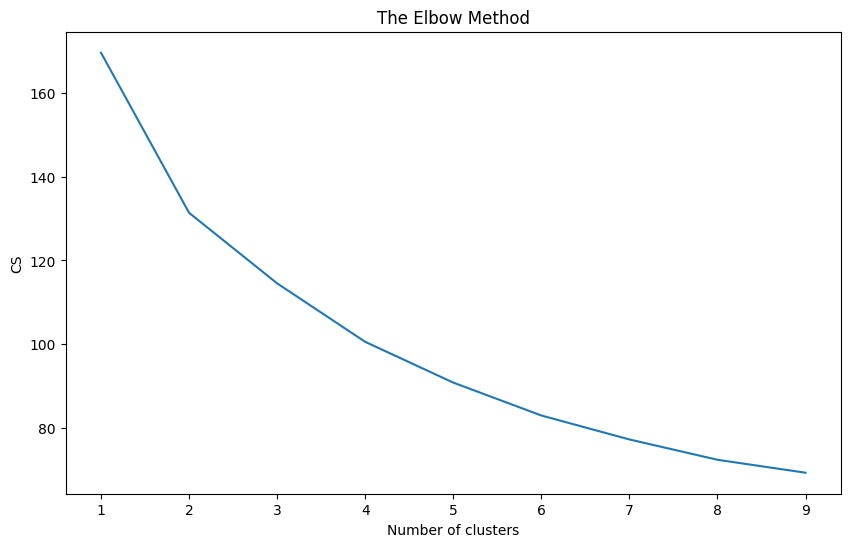

In [12]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [13]:
df.describe()

,ahead,right,left,sharp_right,slight_right,slight_left,sharp_left
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.522157,0.244298,0.221881,0.148659,0.207194,0.183348,0.146959
std,0.307729,0.229610,0.217828,0.176755,0.209966,0.197580,0.175227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.250000,0.222222,0.100000,0.200000,0.142857,0.100000
75%,0.750000,0.428571,0.350000,0.250000,0.300000,0.285714,0.250000
max,1.000000,1.000000,0.900000,0.750000,1.000000,0.777778,1.000000


In [14]:
# Numbe of Optimized clusters here would be 4.
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df)

KMeans(n_clusters=4)

In [15]:
kmeans.cluster_centers_

array([[0.31628205, 0.38233822, 0.12266789, 0.14041514, 0.37180098,
        0.0985348 , 0.10590965],
       [0.80201058, 0.09317989, 0.07018519, 0.06949206, 0.10892593,
        0.10266138, 0.07457672],
       [0.22936508, 0.17812846, 0.40604159, 0.21328904, 0.08930725,
        0.26618678, 0.24122062],
       [0.77002442, 0.38999651, 0.35259899, 0.19931101, 0.30113379,
        0.32007675, 0.19128728]])

In [16]:
kmeans.inertia_

100.54460017291885

In [17]:
pred = kmeans.predict(df)
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    150
0    130
2    129
3     91
Name: cluster, dtype: int64

In [18]:
frame.groupby(['cluster']).mean()

,ahead,right,left,sharp_right,slight_right,slight_left,sharp_left
cluster,,,,,,,
0,0.316282,0.382338,0.122668,0.140415,0.371801,0.098535,0.105910
1,0.802011,0.093180,0.070185,0.069492,0.108926,0.102661,0.074577
2,0.229365,0.178128,0.406042,0.213289,0.089307,0.266187,0.241221
3,0.770024,0.389997,0.352599,0.199311,0.301134,0.320077,0.191287


In [19]:
frame.reset_index(inplace=True)
frame1 = frame.groupby('cluster')['presentedImage'].apply(list).to_dict()

In [20]:
frame1

{0: ['airplanecabin3.jpg',
  'airportTerminal3.jpg',
  'alley1.jpg',
  'alley2.jpg',
  'appleorchard3.jpg',
  'applestore1.jpg',
  'applestore2.jpg',
  'aquarium1.jpg',
  'arcade1.jpg',
  'attic4.jpg',
  'auto_showroom3.jpg',
  'backyard2.jpg',
  'baggageClaim2.jpg',
  'baggageClaim3.jpg',
  'balconyIN2.jpg',
  'basketballcourt4.jpg',
  'baywindow5.jpg',
  'beach1.jpeg',
  'beach2.jpg',
  'bedroom6.jpg',
  'bikerack1.jpg',
  'bistrooutdoor5.jpg',
  'bistrooutdoor6.jpg',
  'bleachers5.jpg',
  'bleachers6.jpg',
  'bleachers8.jpg',
  'boardwalk.jpg',
  'bowlingalley3.jpg',
  'bowlingalley5.jpg',
  'brewery4.jpg',
  'cabinIndoors5.jpg',
  'cafeteria5.jpg',
  'campsite.jpg',
  'campusquad1.jpg',
  'cargo5.jpg',
  'carmechanic4.jpeg',
  'cave.jpg',
  'checkoutcounter2.jpg',
  'checkoutcounter9.jpg',
  'church6.jpg',
  'cliff5.jpg',
  'closet.jpg',
  'clothingstore5.jpg',
  'conference3.jpg',
  'copyroom2.jpg',
  'courthouse2.jpg',
  'deck5.jpg',
  'dentist4.jpg',
  'desertvegetation2.jpg',
 